This notebook is an introduction to Python indexing, not a comprehensive list of things that are possible/required for the course. But there are plenty of other tutorials out there 

In [1]:
import numpy as np # importing numpy, which is always useful
import matplotlib.pyplot as plt # for plotting an image later

In [2]:
img = np.reshape(np.arange(30),(5,6))
print(img)
print("The shape of the image is: ",img.shape)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
The shape of the image is:  (5, 6)


In [3]:
# Let's start with the basic stuff: access a single pixel at a certain location.
# I want the pixel with the value 11, i.e. row 1, column 5.
# We can access images as img[row, column]
pixel = img[1,5]
print(pixel)

11


In [4]:
# Accessing the same cell can be done by utilizing a neat Python trick: Negative indexing. 
# If the index is a negative value, you can think of it as right-to-left-indexing which starts at 1.
# So you start counting from the right / from the bottom, and at 1.
# The rightmost value of a row / the bottom value of a column can be obtained by using the index -1.

pixel2 = img[1,-1]
print(pixel2)

11


In [5]:
# Let's look at an entire row of the image. I want the first row.
# To select an entire range of values, use a colon (:)
row = img[0,:]
print(row)
print(row.shape)

[0 1 2 3 4 5]
(6,)


To explain the logic of the colon-notation, look at the cell below where I extract an image patch: You can interpret it as selection "from:to". Omitting the values is interpreted as "0:-1" (so this is sort of the default-value)

In [6]:
# Selecting an entire column works the same way:
column = img[:,5]
print(column)
print(column.shape)

[ 5 11 17 23 29]
(5,)


In [7]:
# Let's extract a patch of the image. I want the 3x4 matrix in the middle of img:
#  7  8  9 10
# 13 14 15 16
# 19 20 21 22
# First, we need the row-coordinate of the patch. Indices start at 0, so we want rows 1 to 3.
# Next, we need the column-coordinate: 1 to 4

# We can access a patch of an image as img[start_row:end_row, start_column:end_column], but start is included, while end is not,
# so what we need to do is add 1 to the end coordinate.

patch = img[1:4,1:5]
print(patch)
print(patch.shape)

[[ 7  8  9 10]
 [13 14 15 16]
 [19 20 21 22]]
(3, 4)


In [8]:
# Next, let's demonstrate setting the value of parts of the image: I'll set the middle part to zero.
# Because I want to keep using my original image, I'll copy it:
img2 = img.copy() # .copy() actually creates a second image. img2 = img would just mean that I have two pointers to the same image.
img2[1:4,1:5] = 0
print(img2)

[[ 0  1  2  3  4  5]
 [ 6  0  0  0  0 11]
 [12  0  0  0  0 17]
 [18  0  0  0  0 23]
 [24 25 26 27 28 29]]


In [9]:
# Another useful python trick: Iterating over the values of an image. Using two nested loops works, but 
# is not very performant and is a lot of work:
rows, cols = img.shape
for i in range(rows):
    for j in range(cols):
        print(img[i,j])
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [10]:
# It's better to use np.ndindex, which takes the shape of the array to be iterated over and yields a tuple:
for x,y in np.ndindex(img.shape):
    print(img[x,y])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


[[  0. 255.   0. 255.   0. 255.   0. 255.]
 [255.   0. 255.   0. 255.   0. 255.   0.]
 [  0. 255.   0. 255.   0. 255.   0. 255.]
 [255.   0. 255.   0. 255.   0. 255.   0.]
 [  0. 255.   0. 255.   0. 255.   0. 255.]
 [255.   0. 255.   0. 255.   0. 255.   0.]
 [  0. 255.   0. 255.   0. 255.   0. 255.]
 [255.   0. 255.   0. 255.   0. 255.   0.]]


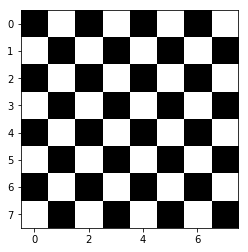

In [11]:
# There is one more way indexing can be utilized: One with two colons, to specify start:end:stepsize.
# This is useful if you want to do something to every second pixel in the image, for example generating a chessboard:
board = np.zeros((8,8))
board[1::2, ::2] = 255
board[::2, 1::2] = 255
print(board)

# you might have to run this cell twice to plot stuff
plt.figure()
plt.imshow(board, cmap='gray')
plt.show()

In [12]:
# One last thing: You can use arrays as indices. Let's say we want to set a bunch of values of the image to -1.
# To do that, we need to collect the row-indices in a list, and the column-indices in another one, and then
# index the array with those indices.

# We will access the indicex (0,2), (1,1) and (4,5)
row = np.array([0, 1, 4])
col = np.array([2, 1, 5])
new_img = img.copy()
new_img[row,col] = -1
print(new_img)

[[ 0  1 -1  3  4  5]
 [ 6 -1  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 -1]]
